In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
airbnb = pd.read_csv('D:\Airbnb_Dataset\AB_NYC_2019.csv')

In [3]:
airbnb.head()
airbnb.shape

(48895, 16)

In [4]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
profile = ProfileReport(airbnb,title = 'Pandas Profiling Report', explorative = True)

In [6]:
profile.to_widgets()

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
airbnb_drop = airbnb.drop(['name','host_name','last_review','reviews_per_month'], axis = 1)

In [10]:
airbnb_drop.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
airbnb_drop.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Exploratory Data Analysis


Lets get some understanding of the dataset using Exploratory Data Analysis.

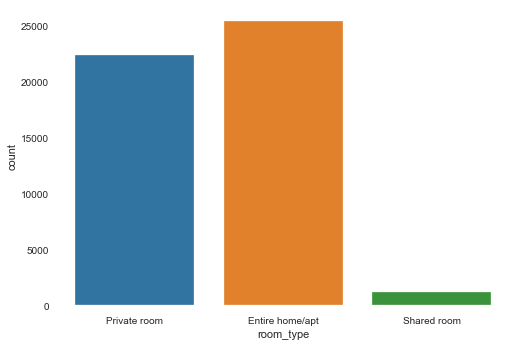

In [12]:
ax = sns.countplot(x = 'room_type',data = airbnb_drop)

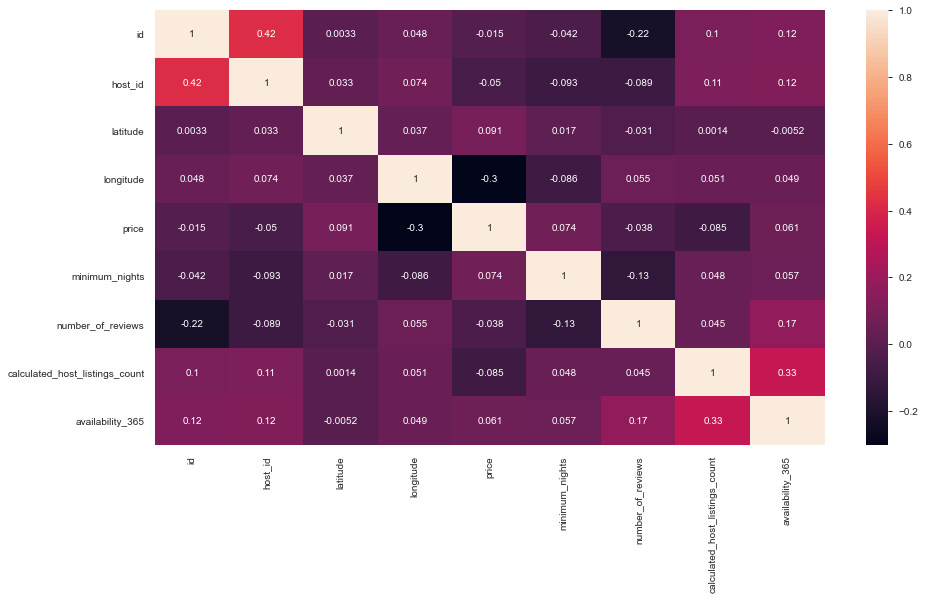

In [13]:
corr = airbnb_drop.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

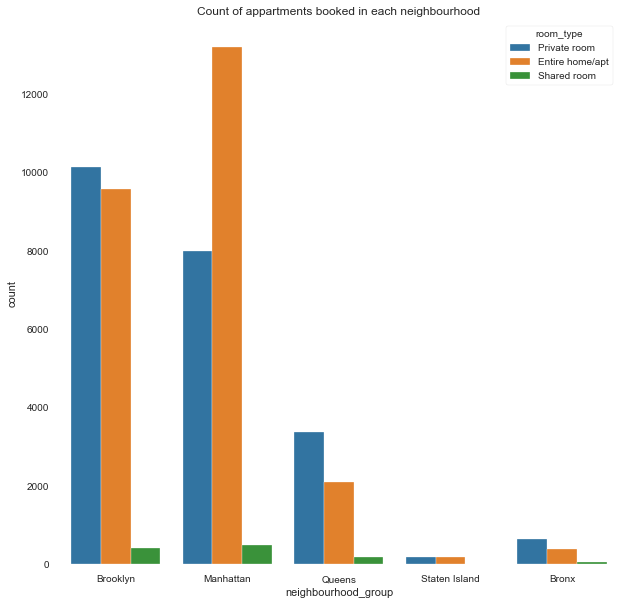

In [14]:
plt.figure(figsize=(10,10))
plt.title("Count of appartments booked in each neighbourhood")
ax = sns.countplot(airbnb_drop['neighbourhood_group'],hue=airbnb_drop['room_type'])


## The number of appartments or houses booked by people according to various areas.

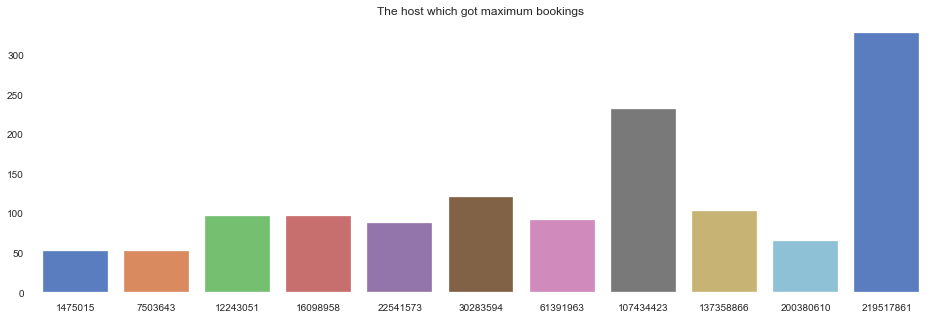

In [15]:
df1 = airbnb_drop.host_id.value_counts()[:11]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.title("The host which got maximum bookings")
plt.show()

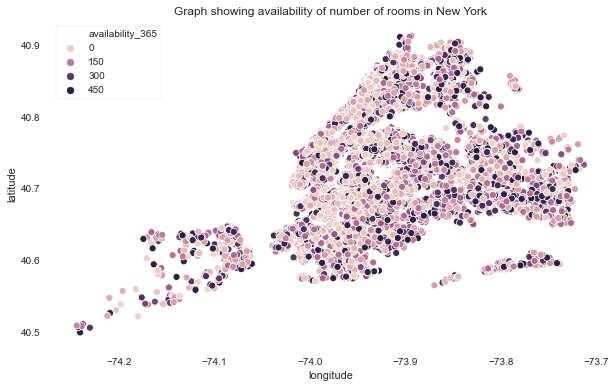

In [16]:
plt.figure(figsize=(10,6))
plt.title("Graph showing availability of number of rooms in New York")
sns.scatterplot(airbnb_drop.longitude,airbnb_drop.latitude,hue=airbnb_drop.availability_365)
plt.ioff()

Modeling


We will be using following models to make predictions.

1.Linear Regression.
2.Decision Tree.

In [17]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
airbnb_drop=airbnb_drop[airbnb_drop.price>0]
airbnb_drop=airbnb_drop[airbnb_drop.availability_365>0]

In [18]:
# Setting the target variable and independent variable
X=['latitude','longitude','minimum_nights','number_of_reviews','availability_365','room_type','neighbourhood_group','neighbourhood']
y= 'price'

In [19]:
data_X= airbnb_drop[X]
data_X.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type,neighbourhood_group,neighbourhood
0,40.64749,-73.97237,1,9,365,Private room,Brooklyn,Kensington
1,40.75362,-73.98377,1,45,355,Entire home/apt,Manhattan,Midtown
2,40.80902,-73.94190,3,0,365,Private room,Manhattan,Harlem
3,40.68514,-73.95976,1,270,194,Entire home/apt,Brooklyn,Clinton Hill
5,40.74767,-73.97500,3,74,129,Entire home/apt,Manhattan,Murray Hill


In [20]:
data_y=airbnb_drop[y]

In [21]:
# encoding the categorical data for making data suitable for machine to learn
X=pd.get_dummies(data_X,prefix_sep='_',drop_first=True)

In [22]:
y=np.log10(data_y)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [43]:
# importing important LinearRegression ML models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [44]:
print(y_pred)


[1.88243468 2.15958919 2.27611926 ... 2.25558547 1.8820047  2.21423192]


In [26]:
# Evaluation of model

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

RMSE: 19972.79
R2 score train: 0.56
R2 score test: -4193802418.01


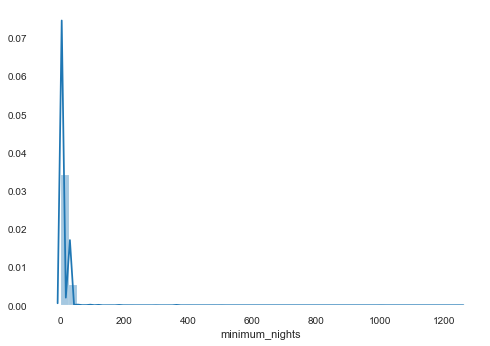

In [27]:
sns.distplot(X.minimum_nights)

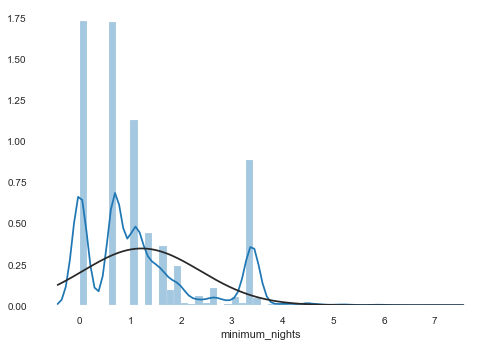

In [28]:
from scipy.stats import norm
log_min_night=np.log(X.minimum_nights)

sns.distplot(log_min_night,fit=norm)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(airbnb_drop['neighbourhood_group'])
airbnb_drop['neighbourhood_group']=le.transform(airbnb_drop['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(airbnb_drop['neighbourhood'])
airbnb_drop['neighbourhood']=le.transform(airbnb_drop['neighbourhood'])

le =LabelEncoder()
le.fit(airbnb_drop['room_type'])
airbnb_drop['room_type']=le.transform(airbnb_drop['room_type'])

airbnb_drop.sort_values(by='price',ascending=True,inplace=True)

airbnb_drop.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
22835,18490141,97001292,3,104,40.69085,-73.79916,0,10,1,43,1,252
31407,24412104,91034542,2,111,40.74408,-73.97803,1,10,5,42,1,2
32810,25839759,167570251,1,188,40.66242,-73.99464,0,10,1,14,1,4
33225,26235873,197169969,3,104,40.68939,-73.79886,0,10,2,22,1,332
35386,28071998,47516406,3,215,40.69139,-73.86086,1,10,7,4,2,180


In [30]:
lm = LinearRegression()

X = airbnb_drop[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = np.log10(airbnb_drop['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_absolute_error
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23588102590068977
        R2 Score: 40.99593156527991
        Mean Absolute Error: 0.17557449651842505
     


In [45]:
print(y_predicts)

[1.82620274 2.16739613 2.33303765 ... 2.27811467 1.82620274 2.33303765]


In [32]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.07891993758856278

        Mean Squared Error: 0.22321601940282693
        R2 Score: 47.161964736860206
        Mean Absolute Error: 0.16371095833232632
     


In [37]:
print(y_predicts)

[1.82620274 2.16739613 2.33303765 ... 2.27811467 1.82620274 2.33303765]
